
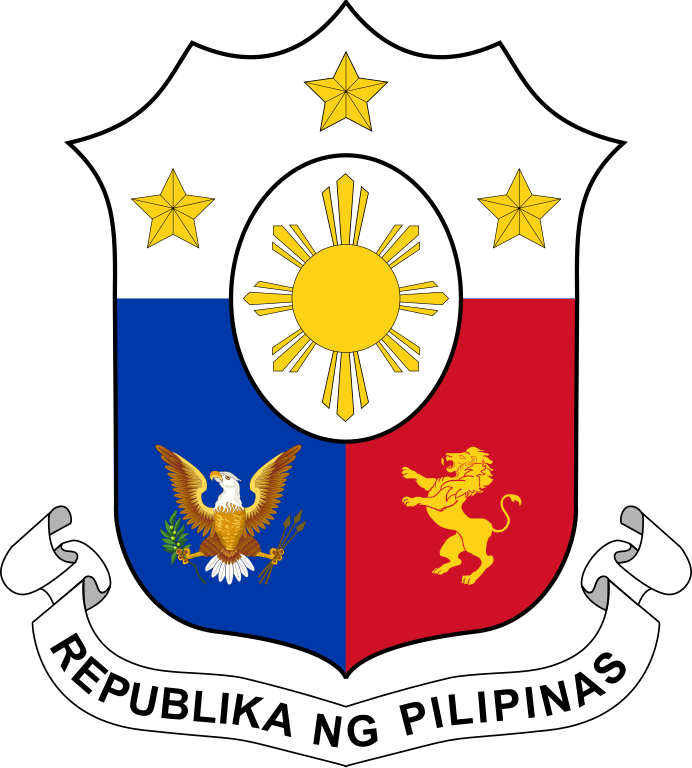
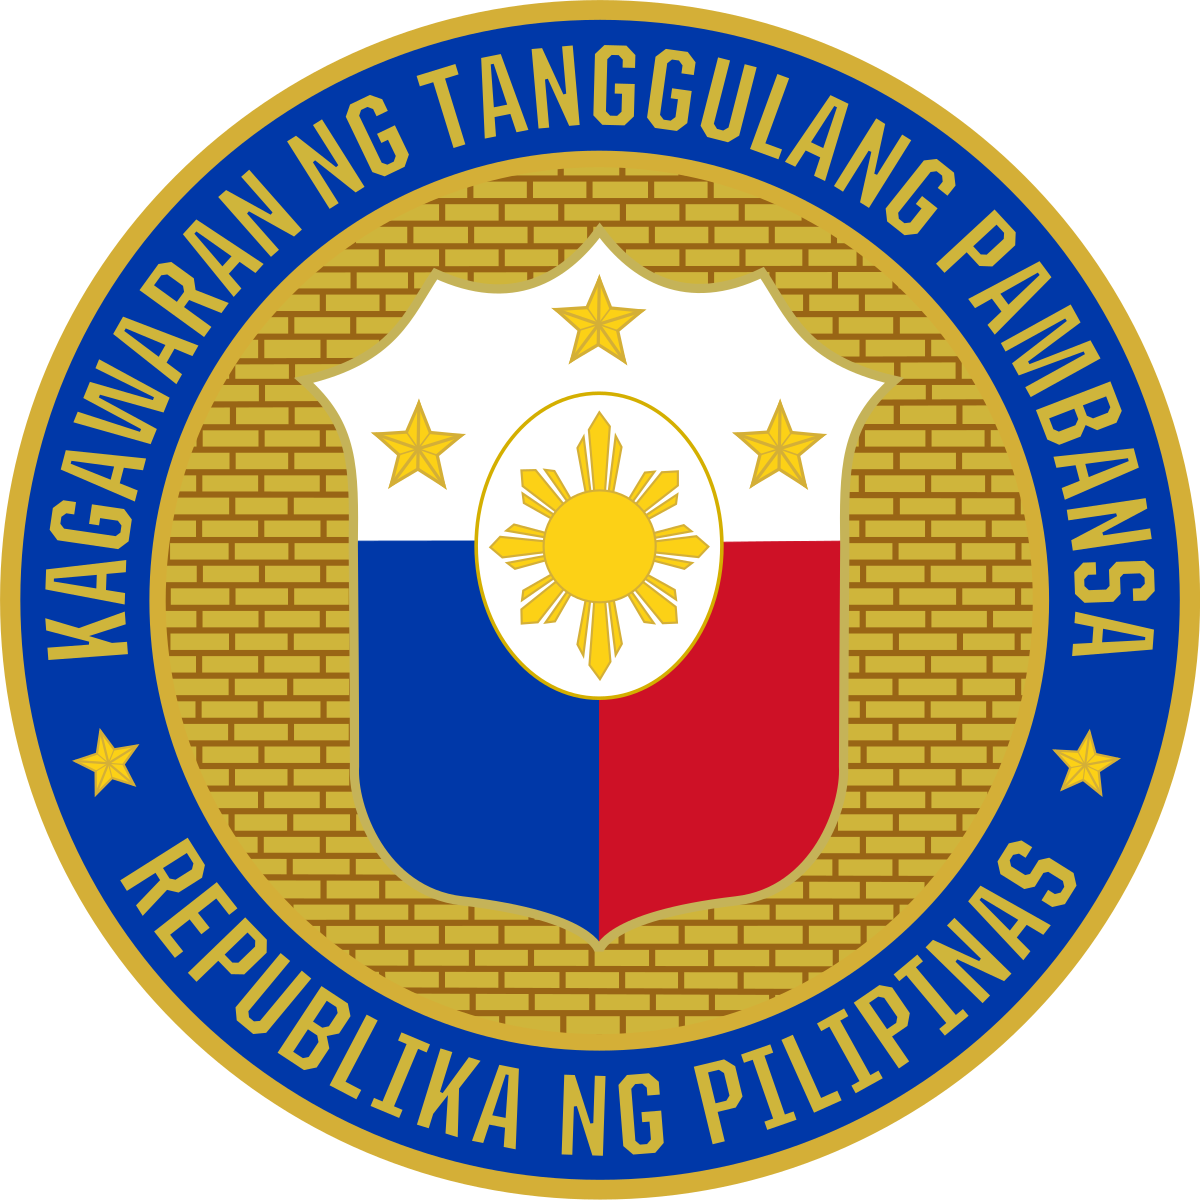
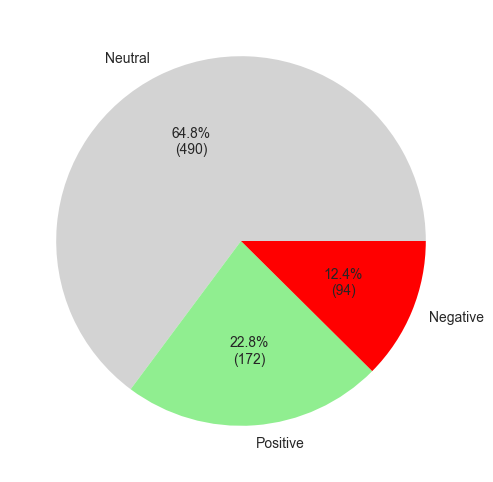
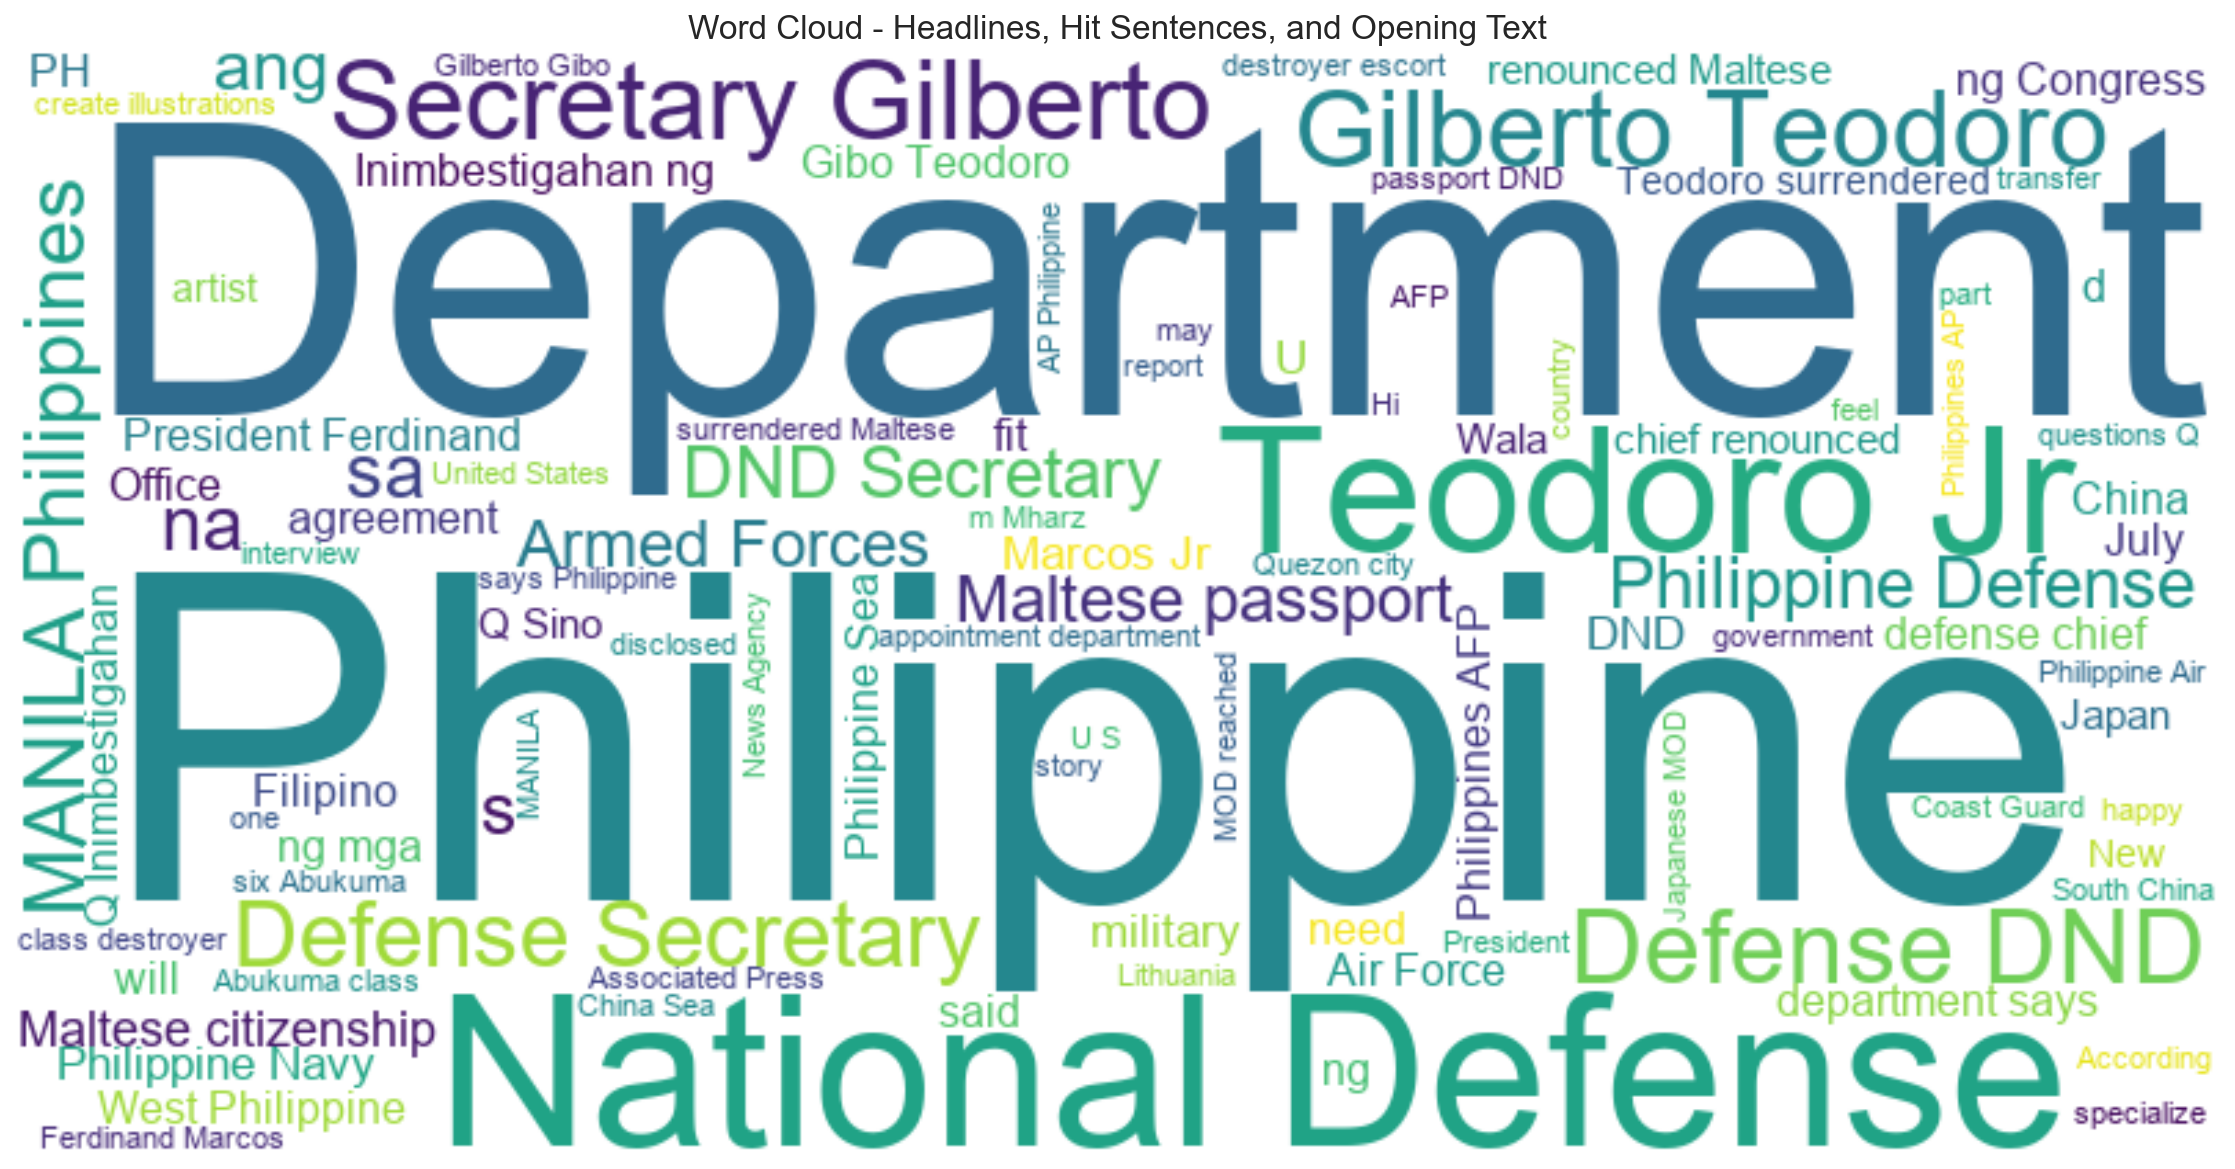

In [1]:
from IPython.display import display, HTML
from datetime import datetime
import base64
import json

# --- A4 PDF Style ---
A4_STYLE = """
<style>
@page {
    size: A4 portrait;
    margin-top: 10mm;
    margin-bottom: 10mm;
    margin-left: 10mm;
    margin-right: 10mm;
}
html, body {
    margin: 0 !important;
    padding: 0 !important;
    font-family: Arial, sans-serif;
    font-size: 11pt;
    line-height: 1.4;
}
div.report {
    width: 100%;
    max-height: 100%;
    overflow: hidden;
    text-align: justify;
}
</style>
"""

# --- Load Metrics ---
with open("metrics.json") as f:
    metrics = json.load(f)

# --- Helpers ---
def embed_image(path, height=60):
    try:
        with open(path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        return f'<img src="data:image/png;base64,{b64}" style="height:{height}px; width:auto;">'
    except FileNotFoundError:
        return f'<span style="color:red;">[Missing: {path}]</span>'

def img_to_base64(path):
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

# --- Images ---
sentiment_img = img_to_base64("results/sentiment.png")
sources_img   = img_to_base64("results/top_sources.png")
wordcloud_img = img_to_base64("results/wordcloud.png")
wordcloud_headline_hit_opening_img = img_to_base64("results/wordcloud_headline_hit_opening.png")
trendline_img = img_to_base64("results/three_day_sentiment_trend.png")

# --- Header ---
now = datetime.now().strftime("%d %b %Y, %H%M HRS")
left_logo = embed_image("logo_left.png", 60)
right_logo = embed_image("logo_right.png", 60)

header_html = f"""
<div style="padding:10px; border-bottom:3px solid #ccc; position:relative;">
  <div style="float:left;">{left_logo}</div>
  <div style="float:right;">{right_logo}</div>
  <div style="text-align:center;">
    <div style="font-size:22px; font-weight:bold;">Department of National Defense</div>
    <div style="font-size:18px;">{metrics["month"]} Media Analysis Report</div>
    <div style="font-size:12px; margin-top:4px;">Report Generated: {now}</div>
  </div>
  <div style="clear:both;"></div>
</div>
"""

# --- Format Numbers ---
try:
    total_volume = f"{int(metrics['total_volume']):,}"
except Exception:
    total_volume = metrics['total_volume']

try:
    total_reach = f"{int(metrics['total_reach']):,}"
except Exception:
    total_reach = metrics['total_reach']

# --- Metric Cards ---
metrics_html = f"""
<div style="display:flex; gap:10px; margin-top:8px;">
  <div style="flex:1; padding:6px; text-align:center; 
              border:2px solid #fdd835; border-radius:8px;">
    <div style="font-size:13px; font-weight:bold;">Total Volume</div>
    <div style="font-size:20px; color:#000;">{total_volume}</div>
  </div>
  <div style="flex:1; padding:6px; text-align:center; 
              border:2px solid #fdd835; border-radius:8px;">
    <div style="font-size:13px; font-weight:bold;">Total Reach</div>
    <div style="font-size:20px; color:#000;">{total_reach}</div>
  </div>
</div>
"""
# --- Top Local Headlines 🇵🇭 ---
top_local_html = """
<div style="margin-top:0; padding:0;">
  <h3 style="border-bottom:2px solid #fdd835; padding-bottom:4px; margin-bottom:4px; font-size:16px; font-weight:bold;">
    Top Local Headlines
  </h3>
  <ol style="margin-left:18px; font-size:13px; padding-left:0;">
"""

for item in metrics.get("top_positive_local", []):
    headline = item["Headline"]
    source = item.get("Source_Normalized", "")
    url = item.get("URL", "#")
    top_local_html += f"""<li style="margin:0 0 2px 0; line-height:1.2;">
        <a href="{url}" target="_blank" style="text-decoration:none; color:black;">{headline}</a> - <strong>{source}</strong>
    </li>"""

top_local_html += """
  </ol>
</div>
"""

# --- Top International Headlines 🌍 ---
top_international_html = """
<div style="margin-top:4px; padding:0;">
  <h3 style="border-bottom:2px solid #fdd835; padding-bottom:4px; margin-bottom:4px; font-size:16px; font-weight:bold;">
    Top International Headlines
  </h3>
  <ol style="margin-left:18px; font-size:13px; padding-left:0;">
"""

for item in metrics.get("top_positive_international", []):
    headline = item["Headline"]
    source = item.get("Source_Normalized", "")
    url = item.get("URL", "#")
    top_international_html += f"""<li style="margin:0 0 2px 0; line-height:1.2;">
        <a href="{url}" target="_blank" style="text-decoration:none; color:black;">{headline}</a> - <strong>{source}</strong>
    </li>"""

top_international_html += """
  </ol>
</div>
"""


#Charts Section

top_traditional_sources = metrics.get("top_traditional_sources", [])
top_social_sources = metrics.get("top_social_sources", [])

top_sources_html = """
<h3 style="border-bottom:2px solid #fdd835; padding-bottom:8px; margin-bottom:8px; font-weight:bold; font-size:18px;">
  Top Sources
</h3>

<div style="margin-bottom:12px;">
  <h4 style="margin:0 0 6px 0; font-size:14px; font-weight:bold;">Traditional Media Sources</h4>
"""
for source in top_traditional_sources:
    name = source["Source"]
    volume = source["Volume"]
    top_sources_html += f'<div style="font-size:13px; margin-bottom:4px;">{name} - {volume} mentions</div>\n'

top_sources_html += """
</div>
<div>
  <h4 style="margin:0 0 6px 0; font-size:14px; font-weight:bold;">Social Media Sources</h4>
"""
for source in top_social_sources:
    name = source["Source"]
    volume = source["Volume"]
    top_sources_html += f'<div style="font-size:13px; margin-bottom:4px;">{name} - {volume} mentions</div>\n'

top_sources_html += f"""
</div>
"""

charts_html = f"""
<div style="display:grid; grid-template-columns:1fr 1fr; gap:20px; margin-top:20px;">

  <div style="background:#fff; padding:20px; border-radius:16px; border:1px solid #ddd;">
    <h3 style="border-bottom:2px solid #fdd835; padding-bottom:8px; margin-bottom:12px; font-size:18px; font-weight:bold;">
      Sentiment Distribution
    </h3>
    <img src="data:image/png;base64,{sentiment_img}" style="max-width:100%; height:auto; border-radius: 8px;">
  </div>

  <div style="background:#fff; padding:20px; border-radius:16px; border:1px solid #ddd; font-family: Arial, sans-serif;">
    {top_sources_html}
  </div>

  <div style="background:#fff; padding:20px; border-radius:16px; border:1px solid #ddd;">
    <h3 style="border-bottom:2px solid #fdd835; padding-bottom:8px; margin-bottom:12px; font-size:18px; font-weight:bold;">
      Daily Sentiment Trend
    </h3>
    <img src="data:image/png;base64,{trendline_img}" style="max-width:100%; height:auto; border-radius: 8px;">
  </div>

  <div style="background:#fff; padding:20px; border-radius:16px; border:1px solid #ddd;">
    <h3 style="border-bottom:2px solid #fdd835; padding-bottom:8px; margin-bottom:12px; font-size:18px; font-weight:bold;">
      Headlines Word Cloud
    </h3>
    <img src="data:image/png;base64,{wordcloud_headline_hit_opening_img}" style="max-width:100%; height:auto; border-radius: 8px;">
  </div>

</div>
"""


full_html = (
    A4_STYLE
    + "<div class='report'>"
    + header_html
    + metrics_html
    + top_local_html
    + top_international_html
    + charts_html
    + "</div>"
)
display(HTML(full_html))



In [2]:
#!jupyter nbconvert --to webpdf --allow-chromium-download --no-input --WebPDFExporter.embed_images=True --log-level=ERROR --WebPDFExporter.chrome_args="--no-pdf-header-footer --print-backgrounds --allow-file-access-from-files --disable-web-security" report.ipynb
